<a href="https://colab.research.google.com/github/CamdenBert/CSCI290/blob/main/gp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import math
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/jhbellingrath/CS-290-Classwork/refs/heads/main/data/survey%20lung%20cancer.csv')

In [ ]:
target="LUNG_CANCER"

In [ ]:
attributes=df.columns[df.columns!=target]
attributes=attributes.drop("AGE")
attributes

Index(['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')

In [ ]:
# entropy function for qualitative
def entropy(attribute):
  entropy = 0
  total = len( df )
  vals = df[attribute].unique()
  for val in vals:
    counts = len(df[ df[attribute] == val ])
    weight = counts / total
    props = df[ df[attribute] == val ][target].value_counts( normalize=True )
  for p in props.array:
    entropy =  entropy - weight*(p*math.log2(p))
  return entropy

In [ ]:
# Gini function
def gini(attribute):
  impurities=[]
  vals=df[attribute].unique()
  for val in vals:
    impurity=0
    impurity_left=1
    weight=len(df[df[attribute]>=val])/len(df)
    counts=(df[df[attribute]>=val][target].value_counts())
    for count in counts.array:
      impurity_left-=((count/(len(df)*weight))**2)
    impurity+=impurity_left*weight
    impurity_right=1
    weight=len(df[df[attribute]<val])/len(df)
    counts=(df[df[attribute]<val][target].value_counts())
    for count in counts.array:
      impurity_right-=((count/(len(df)*weight))**2)
    impurity+=impurity_right*weight
    impurities.append([impurity,val])
  impurities.sort()
  return impurities[0][0]

In [ ]:
gini("ALLERGY ")

0.19687181202855122

In [ ]:
#  entropy for a quantitative variable
def entropy_quantitative(attribute):
  entropies=[]
  total = len(df)
  vals = df[attribute].unique()
  for val in vals:
    entropy_value = 0
    # Left split
    left = df[df[attribute] <= val][[attribute, target]]
    props = left[target].value_counts(normalize=True)
    weight = len(left) / total
    for prop in props.array:
      entropy_value -= weight * prop * math.log2(prop)

    # Right split
    right = df[df[attribute] > val][[attribute, target]]
    props = right[target].value_counts(normalize=True)
    weight = len(right) / total
    for prop in props.array:
      entropy_value -= weight * prop * math.log2(prop)

    entropies.append([entropy_value,val])
  entropies.sort()
  return entropies[0]
  #returns a list of [entropy value,split value]

In [ ]:
def Attribute_selection_method(data,task,target,impurity_measure):
  attributes=data.columns[data.columns!=target]
  if task=="classification":
    if impurity_measure=="entropy":
      entropies=[]
      for attribute in attributes:
        if len(data[attribute].unique())<5:
          entropies.append([entropy(attribute),attribute])
        else:
          entropies.append(entropy_quantitative(attribute))
      entropies.sort()
      return "The best attribute is "+entropies[0][1]
    if impurity_measure=="gini":
      ginis=[]
      for attribute in attributes:
        ginis.append([gini(attribute),attribute])
      ginis.sort()
      return ginis
      return "The best attribute is "+ginis[0][1]

In [ ]:
Attribute_selection_method(df,"classification","LUNG_CANCER","gini")

[[0.19687181202855122, 'ALLERGY '],
 [0.2022049431995164, 'ALCOHOL CONSUMING'],
 [0.2056880629067421, 'SWALLOWING DIFFICULTY'],
 [0.20685907250322627, 'WHEEZING'],
 [0.20693922338441517, 'COUGHING'],
 [0.21256713795768778, 'CHEST PAIN'],
 [0.2129048527419966, 'PEER_PRESSURE'],
 [0.21331434278547207, 'YELLOW_FINGERS'],
 [0.21556004554899105, 'FATIGUE '],
 [0.21560963308536127, 'AGE'],
 [0.21593339325879257, 'ANXIETY'],
 [0.21785516131604077, 'CHRONIC DISEASE'],
 [0.21956978884086303, 'GENDER'],
 [0.21975373431684128, 'SHORTNESS OF BREATH'],
 [0.219820869859928, 'SMOKING']]

In [ ]:
# LabelEncoder
le = LabelEncoder()

In [ ]:
# target variable
df["LUNG_CANCER"] = le.fit_transform(df["LUNG_CANCER"])

In [ ]:
# Compare
X = df.drop(columns=["LUNG_CANCER"])
y = df["LUNG_CANCER"]

In [ ]:
# Iterate over all columns in X
for col in X.columns:
    if X[col].dtype == 'object':  # Check if the column is object
        X[col] = le.fit_transform(X[col])  # Fit and transform


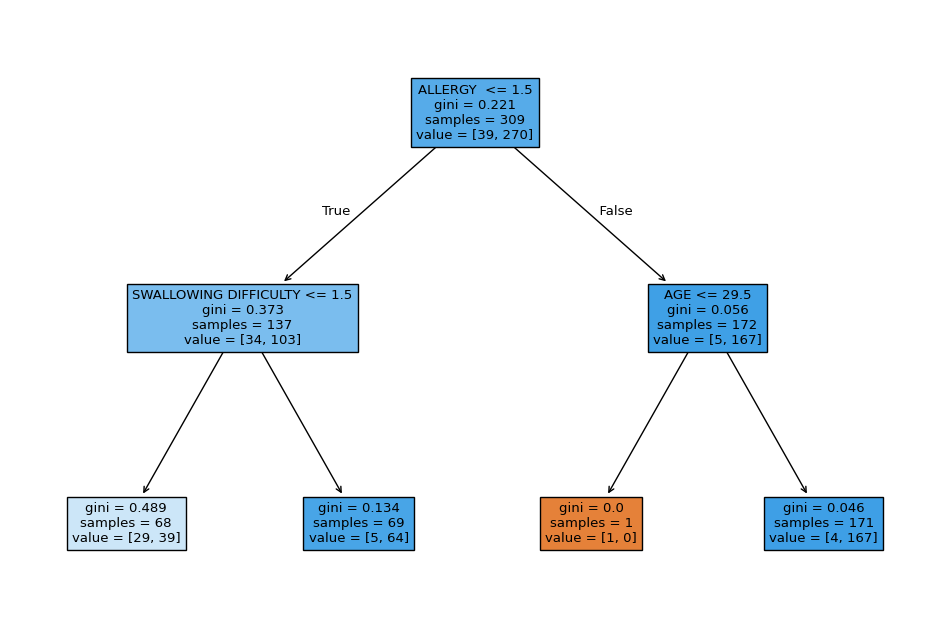

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=2)
clf.fit(X, y)
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()

In [ ]:
# Get the first split attribute
first_split_attribute = X.columns[clf.tree_.feature[0]]
print("First attribute chosen by DecisionTreeClassifier:", first_split_attribute)

First attribute chosen by DecisionTreeClassifier: ALLERGY 


In [ ]:
df2=pd.read_csv('https://raw.githubusercontent.com/jhbellingrath/CS-290-Classwork/refs/heads/main/data/Housing_Prices.csv')

In [ ]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,376000.0,3,2.00,1340,1384,3.0,0,0,3,1340,0,2008
1,800000.0,4,3.25,3540,159430,2.0,0,0,3,3540,0,2007
2,2238888.0,5,6.50,7270,130017,2.0,0,0,3,6420,850,2010
3,324000.0,3,2.25,998,904,2.0,0,0,3,798,200,2007
4,549900.0,5,2.75,3060,7015,1.0,0,0,5,1600,1460,1979


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
target_variable = "price"
#target

In [ ]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
#mean squared error function
#difference between the predicted and actual values
#calculates the mean squared error
#np mean is the average of all the squares

In [ ]:
def best_split(attribute, target):
    unique_values = np.unique(attribute) #get all unique vals from attribute
    best_mse = float('inf') #positive infinity to store lowest mse so far
    best_value = None #stores the lowest mse overall

    for value in unique_values:#goes through eah unique value
        left_mask = attribute <= value #boolean mask is true when attribute is <= current value
        right_mask = attribute > value #opposite of the other one duh

        if np.any(left_mask) and np.any(right_mask): #makes sure there is one point left and right
            y_left = target[left_mask] #gets the target vals that match the data in the left
            y_right = target[right_mask] #the opposite
            mse = (mean_squared_error(y_left, y_left.mean()) * len(y_left) +
                   mean_squared_error(y_right, y_right.mean()) * len(y_right)) / len(target)
            #stupid math you can probably do ina better way than my small brain
            #cal the weighted avg for the split, did it for left and right and then combione them based on num of datapoints in each subset
            #crazy that the comment is shorter than that dumb math
            #pls simplify this
            if mse < best_mse: #i feel like i dont need to explain this to you fat brain
                best_mse = mse
                best_value = value

    return best_value, best_mse #same with this


In [ ]:
def Attribute_selection_method(task, dataset, target_variable): #find the best attribute to split on



    df = pd.DataFrame(dataset) # convert dataset into pandas


    X = df.drop(columns=[target_variable]) #new dataset that doesnt have price
    y = df[target_variable].values # target varibale into numpy array

    best_overall_mse = float('inf') #same as when i did this earleir
    best_attribute = None #also same

    for column in X.columns: #goes through each attribute in x
        value, mse = best_split(X[column].values, y) #calls best split to find best split on current column
        if mse < best_overall_mse:#durp durp durp durp durp duhhhhhhhhh
            best_overall_mse = mse
            best_attribute = column


    tree_model = DecisionTreeRegressor(max_depth=1)
    tree_model.fit(X, y)

    first_split_attribute = X.columns[tree_model.tree_.feature[0]]

    return best_attribute, first_split_attribute, tree_model #return best attribute and first split

In [ ]:
url = "https://raw.githubusercontent.com/jhbellingrath/CS-290-Classwork/refs/heads/main/data/Housing_Prices.csv"
data = pd.read_csv(url)
#getting data cuhhhhh

In [ ]:
task = "regression"
#define the task

In [ ]:
best_attribute, first_split ,tree_model = Attribute_selection_method(task, data, target_variable)
print("Best attribute for split:", best_attribute)
print("First split by DecisionTreeRegressor:", first_split)
#printing all my stuff yurrrrr
#still not sure if this is how to use sklearn or not but its probably chill

Best attribute for split: sqft_living
First split by DecisionTreeRegressor: sqft_living


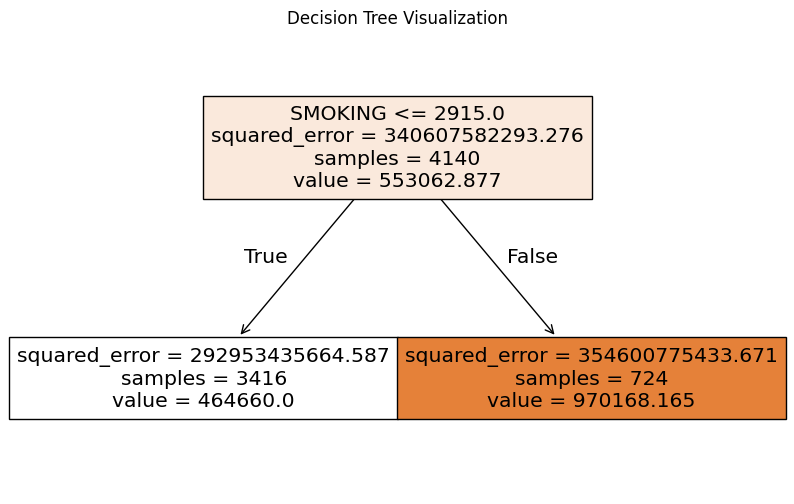

In [ ]:
plt.figure(figsize=(10, 6))
plot_tree(tree_model, feature_names=X.columns, filled=True)
plt.title("Decision Tree Visualization")
plt.show()